In [60]:
import numpy as np
import matplotlib.pyplot as plt
from hybra.fir_filterbank import Audlet_FIR
from hybra.utils import audfilters_fir, response, audtofreq, freqtoaud

In [62]:
audtofreq(freqtoaud(7612) - 3 * 1/2), audtofreq(freqtoaud(7612) - 4 * 1/2)

(6439.945568046544, 6089.574932673563)

In [ ]:
def audlet_HPF():
    # Compute fps and fpe (transition frequencies)
    fps = audtofreq(freqtoaud(fc_high[-2]) - 3 * spacing)
    fpe = audtofreq(freqtoaud(fc_high[-2]) - 4 * spacing)

    # Compute the scaling factor
    g_long = np.concatenate([g[:M2-1,:], np.zeros((M2-1, fs - filter_len))], axis=1)
    temp_resp = np.sum(np.abs(np.fft.rfft(g_long, axis=1))**2, axis=0) / np.sqrt(a)
    Hinv = np.sqrt(max(temp_resp)-temp_resp)

    PK = np.concatenate([np.zeros(fpe),
                         (1 - np.cos(np.pi * (np.linspace(fpe,fps)) / (fps - fpe))) / np.sqrt(8),
                         np.ones(fs//2 - fps) / np.sqrt(2)])
    
    # Compute the HPF
    HPF = np.fft.irfft(PK / Hinv)

    # # Compute fsupp_HP and ratio
    # fsupp_HPF = 2 * (fs // 2 - fpe)
    # ratio = 2 * (fps - fpe) / fsupp_HPF

    # # Lambda function for Lw
    # Lw = min(int(np.ceil(fsupp_HPF * filter_len / fs)), filter_len)

    # # Compute the HPF
    

/Users/Dane/opt/anaconda3/envs/hybra/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Dane/opt/anaconda3/envs/hybra/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


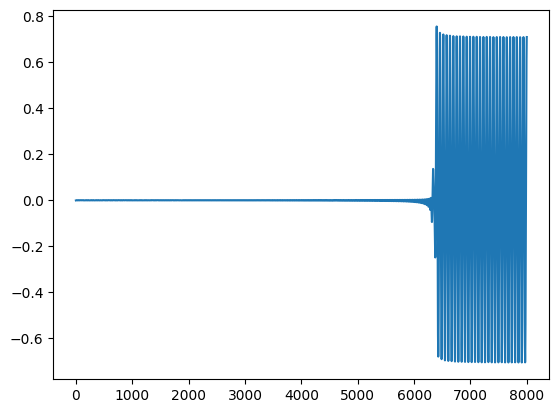

In [65]:
# plateu function for the HPF: 0 from 0 to fps, 1-cos from fps to fpe, and 1 from fpe to fs/2
fps = 6440
fpe = 6090

PK = np.concatenate([np.zeros(fpe), (1 - np.cos(
        np.pi * (np.linspace(fpe,fps)) / (fps - fpe)
    )) / np.sqrt(8),  np.ones(16000//2 - fps) / np.sqrt(2)])

#PK = np.concatenate([PK[::-1], PK])

# Compute the HPF
hpf = np.fft.irfft(PK)
hpf = np.roll(hpf,270)
hpf = hpf[:540]
# # smooth by multiplying a gauss of length 540
# hpf = hpf * np.exp(-np.linspace(-2,2,540)**2)
hpf = np.pad(hpf, (0, 16000-540))

HPF = np.fft.rfft(hpf)

# Plot the HPF
plt.plot(HPF)
# plt.xlim(0, 540)

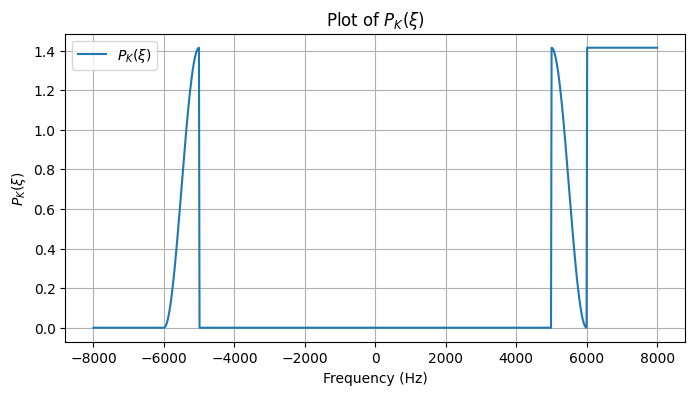

In [25]:
import numpy as np

def P_K(xi, fs, f_N, f_ps_plus, f_ps_minus, f_pe_plus):
    """
    Computes the value of P_K(ξ) based on the given mathematical formula.

    Parameters:
    xi : float or ndarray
        The normalized frequency variable ξ.
    fs : float
        Sampling frequency.
    f_N : float
        Nyquist frequency.
    f_ps_plus : float
        Upper transition frequency f_{p,s}^{+}.
    f_ps_minus : float
        Lower transition frequency (-f_{p,s}^{+}).
    f_pe_plus : float
        Cosine transition frequency f_{p,e}^{+}.

    Returns:
    float or ndarray
        The computed P_K(ξ) value.
    """
    abs_xi_fs = np.abs(xi) * fs

    # Case 1: ξfs ∈ (-f_N, -f_ps_plus) ∪ (f_ps_plus, f_N)
    mask_case1 = (xi*fs >= f_ps_plus) & (xi*fs <= f_N)
    P_K_values = np.where(mask_case1, 2 / np.sqrt(2), 0)

    # Case 2: ξfs ∈ [f_pe_plus, f_ps_plus]
    mask_case2 = (abs_xi_fs >= f_pe_plus) & (abs_xi_fs < f_ps_plus)
    P_K_values[mask_case2] = (1 / np.sqrt(2)) - np.cos(
        np.pi * (abs_xi_fs[mask_case2] - f_ps_plus) / (f_ps_plus - f_pe_plus)
    ) / np.sqrt(2)

    return P_K_values

# Example Usage:
fs = 16000  # Sampling frequency (example)
f_N = fs // 2  # Nyquist frequency
f_ps_plus = 6000  # Example transition frequency
f_ps_minus = -f_ps_plus
f_pe_plus = 5000  # Example cosine transition frequency

xi_values = np.linspace(-0.5, 0.5, 1000)  # Example normalized frequency range
P_K_values = P_K(xi_values, fs, f_N, f_ps_plus, f_ps_minus, f_pe_plus)

# Plot the function
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(xi_values * fs, P_K_values, label='$P_K(\\xi)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('$P_K(\\xi)$')
plt.title('Plot of $P_K(\\xi)$')
plt.legend()
plt.grid()
plt.show()
